# Project - Exploratory Data Analysis

## Import libraries

In [1]:
# Library for data manipulation
import pandas as pd
import numpy as np

# Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library for handling Jupter warnings
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [3]:
df = pd.read_csv('911_Calls_For_Service_2019.csv')

## Data observation

In [4]:
print(f'Rows: {df.shape[0]:,}')
print(f'Columns: {df.shape[1]:,}')

Rows: 1,455,168
Columns: 19


In [5]:
df.columns

Index(['objectid', 'recordid', 'callkey', 'calldatetime', 'priority',
       'district', 'description', 'callnumber', 'incidentlocation', 'location',
       'neighborhood', 'policedistrict', 'policepost', 'councildistrict',
       'sheriffdistricts', 'community_statistical_areas', 'census_tracts',
       'vrizones', 'zipcode'],
      dtype='object')

In [6]:
# Display 5 first observations contents
df.head()

,objectid,recordid,callkey,calldatetime,priority,district,description,callnumber,incidentlocation,location,neighborhood,policedistrict,policepost,councildistrict,sheriffdistricts,community_statistical_areas,census_tracts,vrizones,zipcode
0,1,174699,1201020A5C2B06DF,2019/01/01 01:21:00+00,High,CD,RA POLICE,P190010250,0 S HOWARD ST,0 S HOWARD ST BALTIMORE MD,Downtown,Central,111.0,11.0,D7,Downtown/Seton Hill,Census Tract 401,NaN,21201.0
1,2,172354,1201020A5C2C080C,2019/01/01 19:38:00+00,Medium,CD,RA POLICE,P190012840,2500 EUTAW PL,2500 EUTAW PL BALTIMORE MD,Reservoir Hill,Central,133.0,7.0,D2,Penn North/Reservoir Hill,Census Tract 1301,NaN,21217.0
2,3,172330,1201020A5C2C0998,2019/01/01 19:45:00+00,Medium,CD,RA POLICE,P190012866,2500 EUTAW PL,2500 EUTAW PL BALTIMORE MD,Reservoir Hill,Central,133.0,7.0,D2,Penn North/Reservoir Hill,Census Tract 1301,NaN,21217.0
3,4,172142,1201020A5C2C1BEE,2019/01/01 21:03:00+00,Non-Emergency,NW,RECOVER PROPERTY,P190013069,3900 BARRINGTON RD,3900 BARRINGTON RD BALTIMORE MD,Dorchester,Northwestern,621.0,6.0,D1,Dorchester/Ashburton,Census Tract 1510,NaN,21207.0
4,5,172052,1201020A5C2C27DC,2019/01/01 21:54:00+00,Medium,NW,RA POLICE,P190013167,WABASH AV/ELDORADO AV,WABASH AV and ELDORADO AV BALTIMORE MD,Woodmere,Northwestern,623.0,6.0,D1,Howard Park/West Arlington,Census Tract 2801.02,NaN,21215.0


## Attributes types Identification

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455168 entries, 0 to 1455167
Data columns (total 19 columns):
objectid                       1455168 non-null int64
recordid                       1455168 non-null int64
callkey                        1455168 non-null object
calldatetime                   1455168 non-null object
priority                       1455162 non-null object
district                       1455168 non-null object
description                    1455168 non-null object
callnumber                     1455168 non-null object
incidentlocation               1455168 non-null object
location                       1455168 non-null object
neighborhood                   1431011 non-null object
policedistrict                 1431028 non-null object
policepost                     1431077 non-null float64
councildistrict                1431134 non-null float64
sheriffdistricts               1431097 non-null object
community_statistical_areas    1430478 non-null object
census_

Input variables: 'objectid', 'recordid', 'callkey', 'calldatetime',
       'district', 'description', 'callnumber', 'incidentlocation', 'location',
       'neighborhood', 'policedistrict', 'policepost', 'councildistrict',
       'sheriffdistricts', 'community_statistical_areas', 'census_tracts',
       'vrizones', 'zipcode'

Target Variable: 'priority' which indicates the Police Emergency and Non-Emergency calls to 911 in 2019. 

## Checking and Cleaning Missing Values

In [8]:
df.isna().sum().value_counts(dropna=False)

0          9
24157      1
24091      1
24690      1
24140      1
24138      1
1202120    1
24071      1
6          1
24580      1
24034      1
dtype: int64

In [9]:
df.dropna().shape

(252949, 19)

My dataset had a bunch of missing data, then after cleaning the rows were reduced to 252949 rows and 19 features. So, it still make the required size for our project (> 5,000 rows and 10 features)

## Distribution of the target variable (911 calls priorities)

In [14]:
df['priority'].value_counts()

Non-Emergency     811020
Low               279722
Medium            274299
High               89629
Emergency            315
Out of Service       177
Name: priority, dtype: int64

In [15]:
df.priority.value_counts(normalize=True)

Non-Emergency     0.557340
Low               0.192227
Medium            0.188501
High              0.061594
Emergency         0.000216
Out of Service    0.000122
Name: priority, dtype: float64

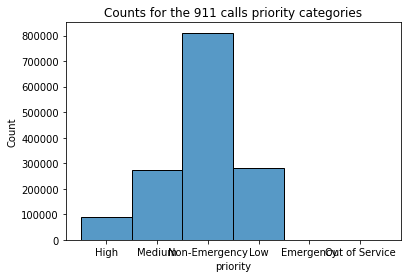

In [16]:
sns.histplot(x = df.priority)
plt.title('Counts for the 911 calls priority categories')
plt.show()

So, I will be performing classification of the above classes. I could make a binary classification of the Emergency vs Non-Emergency.